In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('data/churn modelling.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.shape

(10000, 11)

In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = df.drop('Exited', 1)
y = df.Exited

In [8]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [10]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [11]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

In [12]:
ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols),
    ('s2', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [13]:
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [14]:
p.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('s2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('mod', LogisticRegression(random_state=0))])

In [15]:
# predictions are for the default threshold of 0.5
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
# real class labels of the first 15 people in the test set
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [18]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[1530,   63],
       [ 319,   88]], dtype=int64)

In [19]:
p.classes_

array([0, 1], dtype=int64)

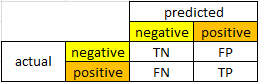

And if we want to switch the class label positions:

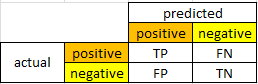

In [20]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[  88,  319],
       [  63, 1530]], dtype=int64)

In [21]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([  88,  319,   63, 1530], dtype=int64)

In [22]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [23]:
precision = tp/(tp+fp)
precision

0.5827814569536424

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [25]:
precision_score(y_test, preds)

0.5827814569536424

In [26]:
recall_score(y_test, preds)

0.21621621621621623

In [27]:
# harmonic mean of precision and recall
f1_score(y_test, preds)

0.31541218637992835

In [28]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, preds, beta=0.5)

0.4352126607319486

In [29]:
# recall more weight than precision (beta > 1)
fbeta_score(y_test, preds, beta=2)

0.2473299606520517

In [30]:
# when both classes need to be predicted with good accuracies, MCC is better than F-measures
matthews_corrcoef(y_test, preds)

0.2692195114515157

In [31]:
from sklearn.metrics import SCORERS

In [32]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## Plotting ROC & Precision-Recall Curves using sklearn functions

In [33]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

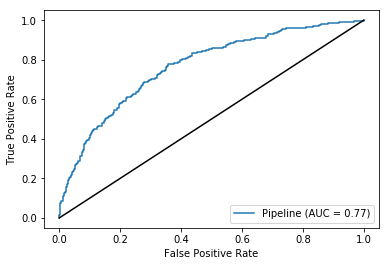

In [35]:
plot_roc_curve(p, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [37]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [38]:
407/(1593+407)

0.2035

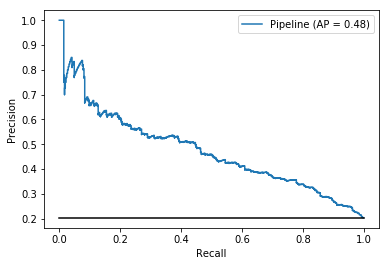

In [40]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')

In [46]:
probs = p.predict_proba(X_test)[:, 1]
probs

array([0.50220097, 0.09743678, 0.26815384, ..., 0.15489024, 0.47404679,
       0.07991856])

In [44]:
p.classes_

array([0, 1], dtype=int64)

In [47]:
from sklearn.preprocessing import Binarizer

In [48]:
binarizer = Binarizer(threshold=0.9)

In [50]:
s = binarizer.fit_transform([probs])
s

array([[0., 0., 0., ..., 0., 0., 0.]])

In [52]:
np.unique(s.ravel(), return_counts=True)

(array([0., 1.]), array([1999,    1], dtype=int64))

In [53]:
binarizer = Binarizer(threshold=0.1)

In [54]:
s = binarizer.fit_transform([probs])
s

array([[1., 0., 1., ..., 1., 1., 0.]])

In [55]:
np.unique(s.ravel(), return_counts=True)

(array([0., 1.]), array([ 610, 1390], dtype=int64))

In [57]:
fpr, tpr, thr = roc_curve(y_test, probs)

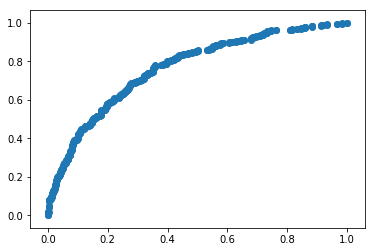

In [58]:
plt.scatter(fpr, tpr)

In [61]:
sorted(probs)

[0.011282896566442472,
 0.011584133700794214,
 0.01181577420402178,
 0.014277033272092308,
 0.014383911431994424,
 0.01634537296579665,
 0.01679335224430788,
 0.01730387852379221,
 0.017585970945906634,
 0.017838294511241345,
 0.01792196374965058,
 0.018452782701086214,
 0.018777717379804937,
 0.018932676128171427,
 0.019581781500572614,
 0.020923153271831755,
 0.02134455470627446,
 0.021492507643872987,
 0.02156647558759987,
 0.021644990660008887,
 0.022307369612987144,
 0.022549148444802183,
 0.0225867092572443,
 0.022985576093913038,
 0.02367546250937054,
 0.02393205277844976,
 0.0244514482482036,
 0.024588438836331487,
 0.02491616284023721,
 0.024935596206417214,
 0.025295015829756025,
 0.025331646855560636,
 0.025482669392532718,
 0.025542520026484,
 0.0257815161353824,
 0.025912309400116827,
 0.026133497949310473,
 0.026637195429486237,
 0.026677167974307667,
 0.027060467959347856,
 0.027231669923709817,
 0.027309601447184324,
 0.027503717769293168,
 0.02760380498803254,
 0.02777

In [62]:
pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'thr':thr
}).head()

,fpr,tpr,thr
0,0.000000,0.000000,1.931711
1,0.000000,0.002457,0.931711
2,0.000000,0.014742,0.839885
3,0.001255,0.014742,0.827222
4,0.001255,0.017199,0.809916


In [73]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [74]:
roc_auc_score(y_test, probs)

0.7659739863129692

In [75]:
average_precision_score(y_test, probs)

0.475147561400464

# Plotting ROC & Precision-Recall Curves from scratch

In [63]:
def plot_roc_curve_from_scratch(y_true, thresholds):
    xax, yax = [], []
    for thr in thresholds:
        preds = Binarizer(threshold=thr).fit_transform([probs]).ravel()
        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
        fpr1 = fp/(fp+tn)
        tpr1 = tp/(tp+fn)
        
        xax.append(fpr1)
        yax.append(tpr1)
    return xax, yax

In [67]:
xax, yax = plot_roc_curve_from_scratch(y_test, np.linspace(0,1,30))

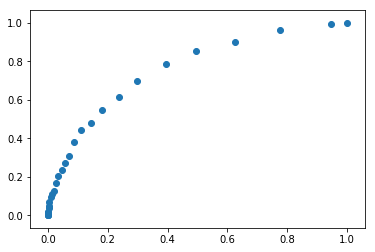

In [68]:
plt.scatter(xax, yax)

In [69]:
def plot_pr_curve_curve_from_scratch(y_true, thresholds):
    xax_pr, yax_pr = [], []
    for thr in thresholds:
        preds = Binarizer(threshold=thr).fit_transform([probs]).ravel()
        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
        precision = tp/(fp+tp)
        recall = tp/(tp+fn)
        
        xax_pr.append(recall)
        yax_pr.append(precision)
    return xax_pr, yax_pr

In [71]:
xax_pr, yax_pr = plot_pr_curve_curve_from_scratch(y_test, [0.1,0.2,0.3,0.4,0.5,0.6])

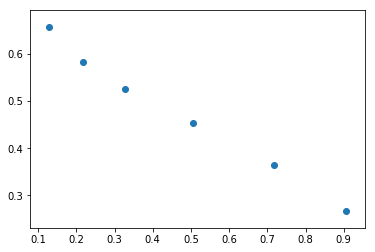

In [72]:
plt.scatter(xax_pr, yax_pr)